SVM Linear Kernal

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

random.seed(50)

# Importing the dataset
dataset = pd.read_csv('./datasets/SyntheticFinancialDatasets/syn_data.csv')
dataset.drop('nameOrig', axis=1, inplace=True)
dataset.drop('nameDest', axis=1, inplace=True)
dataset.drop('isFlaggedFraud', axis=1, inplace=True)

In [63]:
sample_dataframe = dataset.sample(n=50000)
X = sample_dataframe.iloc[:, :-1].values
y = sample_dataframe.iloc[:, 7].values

print(sample_dataframe.isFraud.value_counts())

0    49942
1       58
Name: isFraud, dtype: int64


In [64]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# LabelEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])

# OneHotEncoder
onehotencoder = ColumnTransformer([("type", OneHotEncoder(), [1])], remainder = 'passthrough')
X = onehotencoder.fit_transform(X)

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [65]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

# positive and negative sets counts
counts = np.unique(y_train, return_counts=True)

In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
print(counts)

(array([0, 1], dtype=int64), array([34955,    45], dtype=int64))


In [67]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import LinearSVC
from imblearn.under_sampling import NearMiss
from imblearn import over_sampling as os
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler

In [68]:
# # Apply the sampling
# ada = ADASYN()
# X_resampled, y_resampled = ada.fit_resample(X_train, y_train)
# count = np.unique(y_resampled, return_counts=True)

# Create a pipeline

# pipeline4 = make_pipeline(ADASYN(),LinearSVC(random_state=1))
model = LinearSVC(random_state=1)
model.fit(X_train, y_train)
print(count)

(array([0, 1], dtype=int64), array([69907, 69896], dtype=int64))


C:\Users\fzkuji\.conda\envs\Finance\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [69]:
# Classify and report the results
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, model.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.00      1.00      0.00      0.00      7495
          1       0.00      0.00      1.00      0.00      0.00      0.00         5

avg / total       1.00      1.00      0.00      1.00      0.00      0.00      7500



In [70]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_score,auc,roc_auc_score,roc_curve,recall_score

cm = confusion_matrix(y_val, model.predict(X_val))
roc = roc_auc_score(y_val, model.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, model.predict(X_val))
roc_auc = auc(fpr,tpr)

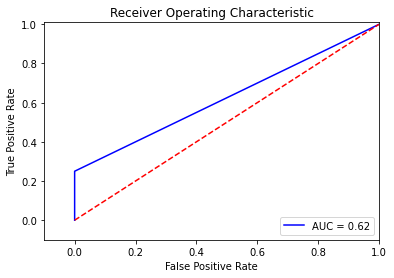

In [71]:
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Linear Kernel SVM = AUC 0.96